<a href="https://colab.research.google.com/github/vaniamusdani/vaniamusdani.github.io/blob/main/Case%20Study%20Clustering%20Analysis%20Group%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA MINING CASE STUDY 02**

KELOMPOK 8
1. M Dzaky Jaya (1806193640)
2. Zahra Novanka (1806185834)
3. Salsabil Felia (1806185815)
4. Muhamad Ido Raskapati (1906354154)
5. I Ketut Doni Damara (1906299502)
6. Timothy Devan Chandra (1906375726)
7. Vania Putri Musdani (1906377706)
8. Angelina Putri (2006464152)


Pertama-tama akan kita import data menggunakan library pandas. Karena data "Case-Study-02-MixITup" berbasis excel, maka kita ubah terlebih dahulu menjadi format csv dengan mengubah nama filenya menjadi CS2.csv dan mengimportnya secara lokal.

Kemudian akan dilihat shape untuk mengetahui jumlah ukuran data seperti jumlah variabel dan jumlah data.



In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv("CS2.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/raskapati/casestudy02/main/CS2%20(2).csv
    df = pd.read_csv("CS2 (2).csv", low_memory = False, encoding='utf8')

df.shape

(200, 10)

Diperoleh bahwa ukuran data yang akan kita analisis memiliki 200 data dan 10 variabel.

Kemudian kita akan melihat df.info untuk mengetahui variabel mana saja yang terdapat missing value serta tipe dari setiap variabel (interger/object/float).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


Secara umum terlihat bahwa terdapat missing value untuk beberapa variabel.

Selanjutnya akan digunakan fungsi duplicated untuk memeriksa jumlah data yang terdapat duplikasi.

In [ ]:
df.duplicated().sum()

0

Setelah diperiksa duplikasinya, diketahui bahwa data yang kita miliki sudah tidak terdapat duplikasi.

Akan dilihat plot Heatmap Missing Value untuk mengetahui sebaran missing value untuk masing-masing variabel yang ada di data kita.

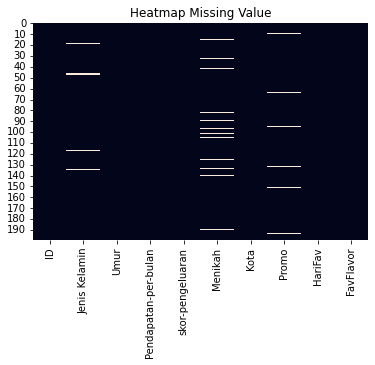

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Terlihat bahwa variabel yang memiliki missing value berada pada variabel Jenis Kelamin, Menikah, dan Promo.


Akan dilihat presentase missing:

In [ ]:
(df.isnull().sum()/len(df)).to_frame('persentase missing')

,persentase missing
ID,0.00
Jenis Kelamin,0.02
Umur,0.00
Pendapatan-per-bulan,0.00
skor-pengeluaran,0.00
Menikah,0.06
Kota,0.00
Promo,0.03
HariFav,0.00
FavFlavor,0.00


Terlihat bahwa ketiga variabel tadi, yaitu Jenis Kelamin, Menikah, dan Promo memiliki persentase missing untuk setiap variabel.

Karena missing value yang terdapat pada data cukup sedikit, maka akan dilakukan penghapusan missing value menggunakan dropna.


In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum(),df.shape)

ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64 (178, 10)


Setelah dihapus missing valuenya, terlihat bahwa data yang kita miliki sekarang hanya 178 data dan 10 variabel.

Akan dilihat kembali data terbaru beserta jenis datanya setelah missing valuenya dihapus.


In [ ]:
print(df.value_counts())
print(df.dtypes)

ID   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran  Menikah  Kota       Promo  HariFav  FavFlavor
101  Wanita         49    13114754              52                1        Jakarta    1.0    Sabtu    2            1
254  Pria           26    19262295              55                1        Jakarta    1.0    Rabu     0            1
229  Wanita         23    22540983              29                1        Tangerang  3.0    Selasa   8            1
230  Pria           55    19672131              43                1        Jakarta    2.0    Minggu   5            1
231  Wanita         44    25819672              20                1        Tangerang  3.0    Sabtu    9            1
                                                                                                                  ..
169  Wanita         20    409836                6                 0        Tangerang  3.0    Senin    0            1
170  Pria           28    35245901              68                1  

Karena setelah dilihat variabel "Umur" berjenis object, maka perlu diubah jenis variabel "Umur" menjadi float karena umur tidak bisa dimasukkan kedalam kategori objek.

In [ ]:
df['Umur'] = df['Umur'].astype('float64')
df.dtypes

ID                        int64
Jenis Kelamin            object
Umur                    float64
Pendapatan-per-bulan      int64
skor-pengeluaran          int64
Menikah                  object
Kota                     object
Promo                   float64
HariFav                  object
FavFlavor                 int64
dtype: object

Kemudian kita akan menghitung jumlah data untuk masing-masing indikator untuk variabel "FavFlavor", "Promo", dan "Menikah" serta kategorinya untuk variabel "Kota"

In [ ]:
df['FavFlavor'].value_counts()

0    37
4    20
8    19
1    19
3    18
7    17
5    17
2    16
6    14
9     1
Name: FavFlavor, dtype: int64

Pada data "FavFlavor" terdapat data yang memiliki indikator 9, karena indikator 9 diluar dari indikator yang ditentukan, maka akan diubah menjadi indikator 2, yang menunjukkan bahwa indikator 2 adalah rasa lainnya.

In [ ]:
df['Kota'].value_counts()

Jakarta      76
Depok        55
Tangerang    46
JJakarta      1
Name: Kota, dtype: int64

Terlihat bahwa terdapat data yang memiliki kesalahan dalam penulisan Kota, sehingga perlu diganti untuk menyesuaikan dengan data yang lainnya.

In [ ]:
df['Promo'].value_counts()

1.0    83
3.0    44
2.0    37
0.0    13
5.0     1
Name: Promo, dtype: int64

Pada data "Promo" terdapat data yang memiliki indikator 5 yang melebihi dari indikator yang telah ditentukan (0-3), hal ini menunjukkan bahwa data tersebut termasuk kedalam indikator 3 karena indikator 3 menandakan bahwa pelanggan tersebut sering menggunakan promo.

In [ ]:
df['Menikah'].value_counts()

1    151
0     26
-      1
Name: Menikah, dtype: int64

Pada data "Menikah" terdapat data yang memiliki indikator "-", karena indikator "-" diluar dari indikator yang ditentukan, maka akan diubah menjadi indikator "1" yang menunjukkan bahwa indikator 1 adalah Menikah. Hal ini dilakukan karena melihat modus dari data pada variabel "Menikah" adalah Menikah (indikator 1).

In [ ]:
df['Kota'] = df['Kota'].replace(['JJakarta'],'Jakarta')
df['Promo'] = df['Promo'].replace([5],3)
df['FavFlavor'] = df['FavFlavor'].replace([9],2)
df['Menikah'] = df['Menikah'].replace(['-'],'1')


Kemudian kita akan menghitung kembali jumlah data untuk masing-masing indikator untuk variabel "FavFlavor", "Promo", dan "Menikah" serta kategorinya untuk variabel "Kota" yang sudah disesuaikan datanya. Akan dihitung juga untuk variabel "Umur" dan "Jenis Kelamin".

In [ ]:
print(df['FavFlavor'].value_counts())
print(df['Kota'].value_counts())
print(df['Promo'].value_counts())
print(df['Menikah'].value_counts())
print(df['Umur'].value_counts())
print(df['Jenis Kelamin'].value_counts())

0    37
4    20
8    19
1    19
3    18
2    17
7    17
5    17
6    14
Name: FavFlavor, dtype: int64
Jakarta      77
Depok        55
Tangerang    46
Name: Kota, dtype: int64
1.0    83
3.0    45
2.0    37
0.0    13
Name: Promo, dtype: int64
1    152
0     26
Name: Menikah, dtype: int64
32.0    10
19.0     8
35.0     7
27.0     6
40.0     6
48.0     6
23.0     6
47.0     6
49.0     5
29.0     5
50.0     5
54.0     5
34.0     5
20.0     5
30.0     5
38.0     5
21.0     5
59.0     4
43.0     4
45.0     4
46.0     4
36.0     4
24.0     4
28.0     4
22.0     3
33.0     3
31.0     3
42.0     3
25.0     3
53.0     3
18.0     3
37.0     3
60.0     3
58.0     3
44.0     3
57.0     3
41.0     2
55.0     2
39.0     2
52.0     2
56.0     2
26.0     2
51.0     1
2.0      1
Name: Umur, dtype: int64
Wanita    95
Pria      82
-          1
Name: Jenis Kelamin, dtype: int64


Terlihat bahwa terdapat data salah satu pelanggan dengan umur 2 tahun yang dimana datanya tidak valid. Sehingga kami memutuskan untuk menghapus data tersebut menggunakan df.drop


In [ ]:
df.loc[(df['Umur']==2)]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,220,Pria,2.0,18032786,41,0,Jakarta,2.0,Senin,0


In [ ]:
df.drop(119, inplace=True)

Terlihat pula bahwa terdapat data salah satu pelanggan dengan jenis kelamin "-" yang dimana datanya tidak valid. Sehingga kami memutuskan untuk menghapus data tersebut menggunakan df.drop.

In [ ]:
df.loc[(df['Jenis Kelamin']=='-')]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
185,286,-,21.0,0,81,0,Depok,1.0,Jumat,0


In [ ]:
df.drop(185, inplace=True)

Akan dibuat Plot untuk sebaran data dengan membandingkan "skor-pengeluaran" dengan "Pendapatan-per-bulan" untuk mengetahui gambaran berapa cluster yang terbentuk dari data.

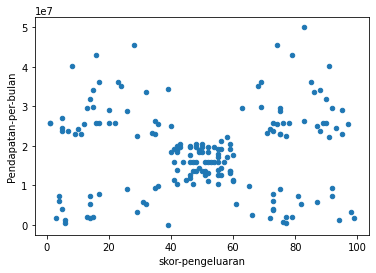

In [ ]:
df.plot.scatter('skor-pengeluaran','Pendapatan-per-bulan')

In [ ]:
df.loc[df['HariFav']=='Sabtu','Tipe Hari'] = 'Weekend'
df.loc[df['HariFav']=='Minggu','Tipe Hari'] = 'Weekend'

df.loc[df['HariFav']=='Senin','Tipe Hari'] = 'Weekday'
df.loc[df['HariFav']=='Selasa','Tipe Hari'] = 'Weekday'
df.loc[df['HariFav']=='Rabu','Tipe Hari'] = 'Weekday'
df.loc[df['HariFav']=='Kamis','Tipe Hari'] = 'Weekday'
df.loc[df['HariFav']=='Jumat','Tipe Hari'] = 'Weekday'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    176 non-null    int64  
 1   Jenis Kelamin         176 non-null    object 
 2   Umur                  176 non-null    float64
 3   Pendapatan-per-bulan  176 non-null    int64  
 4   skor-pengeluaran      176 non-null    int64  
 5   Menikah               176 non-null    object 
 6   Kota                  176 non-null    object 
 7   Promo                 176 non-null    float64
 8   HariFav               176 non-null    object 
 9   FavFlavor             176 non-null    int64  
 10  Tipe Hari             176 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.5+ KB


In [ ]:
df['Tipe Hari'].value_counts()

Weekday    94
Weekend    82
Name: Tipe Hari, dtype: int64

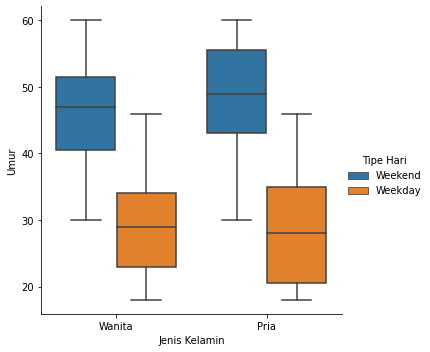

In [ ]:
import seaborn as sns
p = sns.catplot(x="Jenis Kelamin", y="Umur", hue="Tipe Hari", kind="box", data=df)

Terlihat dari Box Plot bahwa pelanggan yang berumur kurang lebih 35 tahun kebawah membeli ice cream pada hari weekday, untuk umur 35 tahun keatas cenderung membeli ice cream pada weekend.

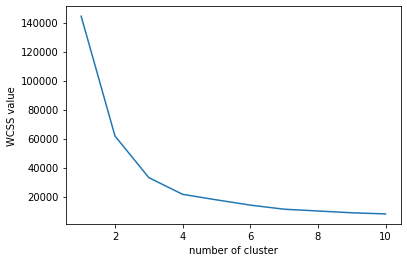

In [ ]:
var = df.iloc[:, [2,4]].values

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 30)
    kmeans.fit(var)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS value")
plt.show()

akan dipilih jumlah cluster yaitu 6



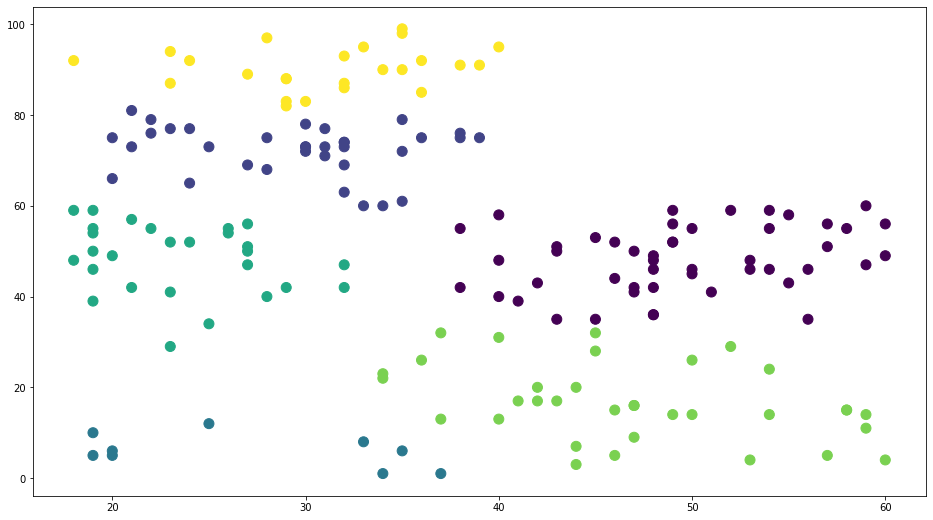

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 6, random_state = 30)
cluster = kmeans.fit_predict(var)

df = df.assign(cluster = cluster)

plt.figure(figsize = (16,9))

plt.scatter(df["Umur"].array,
            df["skor-pengeluaran"].array,
            c = df["cluster"],
			s = 100)

**KESIMPULAN**

Data yang dimiliki perusahaan MixITup Ice cream bisa dibilang cukup baik, karena hanya terdapat sedikit missing value dan beberapa data yang tidak valid. Sehingga cukup mudah untuk melakukan Cleaning Data.

**SARAN**

Setelah menganalisis data yang dimiliki perusahaan tersebut, terlihat bahwa untuk rasa favorite yang pelanggan minati adalah vanila.

Kemudian Kota yang cukup terdapat banyak penjualan adalah Kota Jakarta.

Kelompok kami menyarankan untuk perusahaan MixITup Ice cream apabila ingin memiliki tambahan omset atau penghasilan, dapat menjual lebih banyak Ice Cream rasa vanila serta membuka cabang lebih banyak di daerah Jakarta. Disamping itu juga, perusahaan tersebut perlu meningkatkan promosi untuk rasa-rasa ice cream selain vanila agar penjualan rasa lain juga dapat maksimal.

Informasi dari boxplot berguna untuk menentukan target penjualan dengan mengadakan promo yang dapat disesuaikan pada hari weekday atau weekend.